# PROJET SISE 2020-2021 BIG DATA MINING

## Classification dans un contexte déséquilibré - une application à la fraude bancaire

##### Equipe projet : Mathias Da Costa Meira, Fabrice Petitfrere

***

## 1. ANALYSE PRELIMINAIRE

### Chargement des données

In [1]:
import pandas as pd
df = pd.read_csv('S:/08 - Fouille de données massives/Projet/dataproject.txt', sep=";", decimal=',', encoding='UTF-8')
#df = pd.read_csv('E:/M2 - SISE/Detection fraude cheque/dataproject.txt', sep=';',decimal=',',encoding='UTF-8')
df.head(10)

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
0,A034010041908012010710730,71051532,40.17,2016-03-21 07:47:38,0,1,1,1,535,0.000000,...,21.834061,0,1,4.0,4.0,4.0,40.17,0.0,28058,0
1,A035010041908006493331734,71051533,20.00,2016-03-21 08:04:57,0,0,0,0,358,0.000000,...,12.586532,0,1,4.0,4.0,4.0,20.00,0.0,29097,0
2,A013010003908005150136747,71051534,35.00,2016-03-21 08:06:45,0,0,0,0,199,0.000000,...,39.274924,0,1,4.0,4.0,4.0,35.00,0.0,29205,0
3,A013010041908025639221029,71051536,20.00,2016-03-21 08:11:38,0,0,0,0,38,0.000000,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29498,0
4,A013010003908005556100283,71051538,20.00,2016-03-21 08:17:11,0,0,0,0,26,0.000000,...,39.274924,0,1,4.0,4.0,4.0,20.00,0.0,29831,0
5,A007010278908891620264901,71051539,35.09,2016-03-21 08:17:26,0,0,0,0,459,0.000000,...,35.523979,0,1,4.0,4.0,4.0,35.09,0.0,29846,0
6,A056010003908116850002378,71051541,60.00,2016-03-21 08:19:56,0,0,0,0,500,0.000000,...,12.586532,0,1,4.0,4.0,4.0,60.00,0.0,29996,0
7,A034013506908085106167163,71051542,120.00,2016-03-21 08:20:42,0,1,1,1,389,0.308483,...,21.834061,0,1,4.0,4.0,4.0,120.00,0.0,30042,0
8,A056015589908090385895930,71051544,59.25,2016-03-21 08:21:04,0,1,1,1,538,0.000000,...,12.586532,0,1,4.0,4.0,4.0,59.25,0.0,30064,0
9,A056015589908093500453310,71051548,17.00,2016-03-21 08:22:56,0,0,0,0,13,0.000000,...,12.586532,0,1,4.0,4.0,4.0,17.00,0.0,30176,0


### Inspection initiale

In [2]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ZIBZIN
False    2231369
Name: ZIBZIN, dtype: int64

IDAvisAutorisAtionCheque
False    2231369
Name: IDAvisAutorisAtionCheque, dtype: int64

MontAnt
False    2231369
Name: MontAnt, dtype: int64

DAteTrAnsAction
False    2231369
Name: DAteTrAnsAction, dtype: int64

CodeDecision
False    2231369
Name: CodeDecision, dtype: int64

VerifiAnceCPT1
False    2231369
Name: VerifiAnceCPT1, dtype: int64

VerifiAnceCPT2
False    2231369
Name: VerifiAnceCPT2, dtype: int64

VerifiAnceCPT3
False    2231369
Name: VerifiAnceCPT3, dtype: int64

D2CB
False    2231369
Name: D2CB, dtype: int64

ScoringFP1
False    2231369
Name: ScoringFP1, dtype: int64

ScoringFP2
False    2231369
Name: ScoringFP2, dtype: int64

ScoringFP3
False    2231369
Name: ScoringFP3, dtype: int64

TAuxImpNb_RB
False    2231369
Name: TAuxImpNb_RB, dtype: int64

TAuxImpNB_CPM
False    2231369
Name: TAuxImpNB_CPM, dtype: int64

EcArtNumCheq
False    2231369
Name: EcArtNumCheq, dtype: int64

NbrMAgAsin3J
False    2231369
Name: NbrMAgAsin

Il n'y a aucune valeur manquante dans le jeu de données !

In [3]:
# Types de données
df.dtypes

ZIBZIN                       object
IDAvisAutorisAtionCheque      int64
MontAnt                     float64
DAteTrAnsAction              object
CodeDecision                  int64
VerifiAnceCPT1                int64
VerifiAnceCPT2                int64
VerifiAnceCPT3                int64
D2CB                          int64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TAuxImpNb_RB                float64
TAuxImpNB_CPM               float64
EcArtNumCheq                  int64
NbrMAgAsin3J                  int64
DiffDAteTr1                 float64
DiffDAteTr2                 float64
DiffDAteTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                         int64
FlAgImpAye                    int64
dtype: object

### Analyse descriptive

In [4]:
# Nombre total de transactions
df.shape

(2231369, 23)

In [5]:
# Statistiques générales
df.describe()

,IDAvisAutorisAtionCheque,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,...,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06,2.231369e+06
mean,7.356762e+07,5.991771e+01,1.288043e-02,3.991402e-01,4.296752e-01,4.816980e-01,2.477938e+02,3.100542e+00,6.882686e-01,1.769416e-01,...,3.256122e+01,6.724334e+03,1.034200e+00,3.947808e+00,4.234163e+00,4.266234e+00,6.683475e+01,6.917041e+00,5.347306e+04,2.804108e-03
std,1.458268e+06,7.980922e+01,1.682062e-01,5.250070e-01,6.056457e-01,7.339127e-01,2.131088e+02,3.047480e+01,9.336748e+00,5.662696e-01,...,3.475789e+01,1.742520e+05,1.862585e-01,1.078915e+00,5.510923e-01,4.643674e-01,8.929606e+01,3.550385e+01,1.200173e+04,5.287955e-02
min,7.105153e+07,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.969986e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.745370e-04,1.365741e-03,1.000000e-02,0.000000e+00,1.336000e+03,0.000000e+00
25%,7.232987e+07,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.874265e-03,-2.869431e+00,1.179973e-03,...,1.390821e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.792000e+01,0.000000e+00,4.248500e+04,0.000000e+00
50%,7.353719e+07,4.235000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430000e+02,1.543502e-02,0.000000e+00,2.131271e-03,...,2.526529e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.732000e+01,0.000000e+00,5.488200e+04,0.000000e+00
75%,7.480167e+07,7.205000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.680000e+02,1.370299e-01,5.289664e+00,1.533859e-02,...,3.927492e+01,0.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,8.130000e+01,0.000000e+00,6.390700e+04,0.000000e+00
max,7.619241e+07,1.698534e+04,3.000000e+00,1.500000e+01,4.000000e+01,4.000000e+01,5.510000e+02,1.680000e+04,4.702998e+01,1.839140e+01,...,7.142857e+02,9.993474e+06,1.000000e+01,5.000000e+00,5.000000e+00,5.000000e+00,1.698534e+04,1.060000e+04,8.256400e+04,1.000000e+00


#### Analyse des transactions acceptées / refusées

In [10]:
# Séparation des transactions acceptées / refusées
refus = df[df['FlAgImpAye'] == 1]
accept = df[df['FlAgImpAye'] == 0]

# Subset des 10000 premières transactions
accept10000 = accept.head(1000)

# Répartion des transactions
a = accept.shape[0]
r = refus.shape[0]

print("Nombre de transactions acceptées : {}".format(a))
print("Nombre de transactions refusées  : {}".format(r))

# Taux de transactions refusées dans la population totale
tx = refus.shape[0] / df.shape[0] *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx))

Nombre de transactions acceptées : 2225112
Nombre de transactions refusées  : 6257
Taux de transactions refusées sur le total : 0.28 %


In [11]:
# Résumé des transactions refusées
refus.describe()

,IDAvisAutorisAtionCheque,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
count,6.257000e+03,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,...,6257.000000,6.257000e+03,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.0
mean,7.372501e+07,94.557721,0.049385,0.582228,0.762506,1.043791,120.252357,13.129692,-6.484655,0.548859,...,40.543897,4.913774e+03,1.113952,3.462059,4.132642,4.308389,125.447465,30.889744,55993.042832,1.0
std,1.461851e+06,133.659270,0.326215,0.736553,1.035116,1.660143,174.550080,60.269539,10.487739,1.496775,...,46.146348,1.356109e+05,0.427206,1.662598,1.004134,0.696478,183.762486,103.232060,11768.679965,0.0
min,7.105166e+07,3.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-43.111829,0.000000,...,0.000000,0.000000e+00,1.000000,0.000324,0.003507,0.016412,4.000000,0.000000,1402.000000,1.0
25%,7.249057e+07,31.160000,0.000000,0.000000,0.000000,0.000000,1.000000,0.011909,-13.557330,0.002155,...,21.834061,0.000000e+00,1.000000,2.167292,4.000000,4.000000,38.340000,0.000000,45944.000000,1.0
50%,7.379739e+07,50.630000,0.000000,0.000000,0.000000,0.000000,13.000000,0.186288,-3.432834,0.026118,...,26.478376,0.000000e+00,1.000000,4.000000,4.000000,4.000000,69.880000,0.000000,57660.000000,1.0
75%,7.498143e+07,103.240000,0.000000,1.000000,1.000000,2.000000,198.000000,3.941429,0.000000,0.716043,...,41.356493,1.000000e+00,1.000000,5.000000,5.000000,5.000000,143.130000,23.110000,65860.000000,1.0
max,7.619233e+07,3825.610000,3.000000,9.000000,12.000000,18.000000,551.000000,905.000000,32.520261,18.391399,...,714.285714,7.423270e+06,7.000000,5.000000,5.000000,5.000000,5156.190000,3775.720000,79798.000000,1.0


### Comparaison de moyennes

Nous analysons les moyennes des variables en fonction du type de transaction (refusée ou acceptée).  
On note que la moyenne pour certaines variables n'ont que très peu de différence entre les transactions acceptées et refusées. Ce sont des variables que nous déciderons de ne pas considérer dans la suite, à savoir :
- ScoringFP3
- NbrMAgAsin3J
- DiffDAteTr1
- DiffDAteTr2
- DiffDAteTr3
- Heure 

In [12]:
df.groupby('FlAgImpAye').mean()

,IDAvisAutorisAtionCheque,MontAnt,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure
FlAgImpAye,,,,,,,,,,,,,,,,,,,,
0,7.356717e+07,59.820306,0.012778,0.398625,0.428739,0.480117,248.152462,3.072340,0.708439,0.175896,32.838723,32.538772,6729.425304,1.033976,3.949174,4.234448,4.266116,66.669936,6.849630,53465.969675
1,7.372501e+07,94.557721,0.049385,0.582228,0.762506,1.043791,120.252357,13.129692,-6.484655,0.548859,42.546430,40.543897,4913.774173,1.113952,3.462059,4.132642,4.308389,125.447465,30.889744,55993.042832


Nous allons un peu plus loin pour le montant des transactions pour comprendre la différence de moyenne que nous observons.

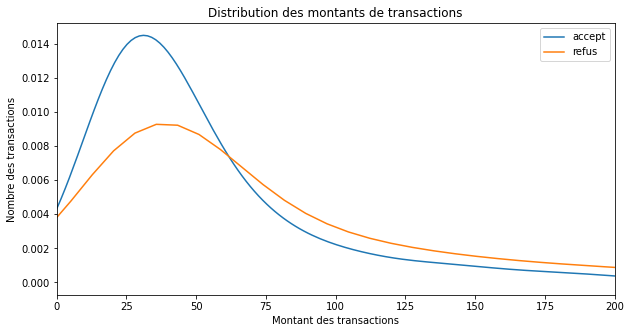

In [14]:
# Subplot 1
import matplotlib.pyplot as plt
accept10000["MontAnt"].plot(kind='kde', # basé sur les 10000 premières transactions seulement (trop lent sinon !)
                   xlim=(0,200),
             stacked=False,
             figsize=(10, 5),
             )
# Subplot 2:
refus["MontAnt"].plot(kind='kde',
                   xlim=(0,200),
             stacked=False,
             figsize=(10, 5),
             )
plt.xlabel("Montant des transactions")
plt.ylabel("Nombre des transactions")
plt.title("Distribution des montants de transactions")
plt.legend(['accept','refus'])

plt.show()

En faisant un focus sur les 10000 premières transactions, on peut visualiser le décalage de montant entre les transactions refusées et les transactions acceptées. Les transactions refusées ont une moyenne plus élevée et une variance plus importante à la vue de graphique.

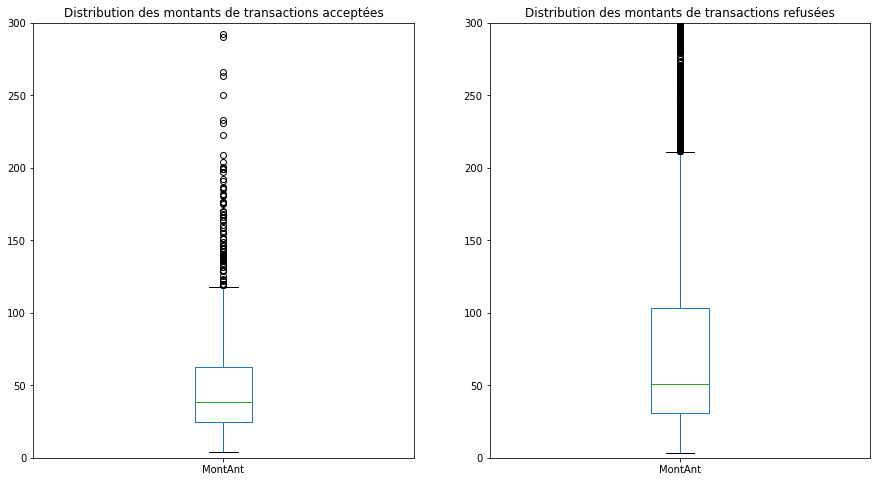

In [15]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


accept10000["MontAnt"].plot(kind='box',
                   ylim=(0,300),
             stacked=False,
             figsize=(15, 8),
             ax=ax0
             )
ax0.set_title("Distribution des montants de transactions acceptées")

refus["MontAnt"].plot(kind='box',
                   ylim=(0,300),
             stacked=False,
             figsize=(15, 8),
             ax=ax1
             )
ax1.set_title("Distribution des montants de transactions refusées")

plt.show()

Testons si la différence de moyenne est significative !

In [16]:
# Calcul de la différence des moyennes
m_refus = refus["MontAnt"].mean()
m_accept = accept["MontAnt"].mean()

d = m_refus - m_accept
print("m_refus =",m_refus)
print("m_accept =",m_accept)
print("d =",d)

# Variances
std_refus = refus["MontAnt"].std()
std_accept = accept["MontAnt"].std()
print("std refus = {}".format(std_refus))
print("std accept = {}".format(std_accept))

# calcul de l'intervalle d'estimation à 5%
from scipy import stats
import numpy as np
u = stats.norm.ppf(0.975)
e = u*np.sqrt(std_refus**2/r+std_accept**2/a)
interval = [d-e,d+e]
print("u = {}".format(u))
print("e = {}".format(e))
print(interval)


m_refus = 94.55772095253336
m_accept = 59.82030618237889
d = 34.737414770154466
std refus = 133.65926983611553
std accept = 79.58524228720847
u = 1.959963984540054
e = 3.3134504375977487
[31.423964332556718, 38.05086520775222]


La différence de montant moyen de transaction entre acceptées et refusées est effectivement significative à 5% et comprise entre 31 et 38 €.

### Corrélations

Faison une sélection de variables sur lesquelles examiner les corrélations.  
Examinons d'abord les différentes variables.

In [17]:
pd.DataFrame(df.columns)

,0
0,ZIBZIN
1,IDAvisAutorisAtionCheque
2,MontAnt
3,DAteTrAnsAction
4,CodeDecision
5,VerifiAnceCPT1
6,VerifiAnceCPT2
7,VerifiAnceCPT3
8,D2CB
9,ScoringFP1


In [18]:
varcorr = [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
dfcorr = df.iloc[:,varcorr]

Etablissons les coefficients de corrélation pour les variables sélectionnées

In [19]:
dfcorr.corr()

,MontAnt,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TAuxImpNb_RB,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure
MontAnt,1.000000,0.449371,0.421585,0.389742,-0.066918,0.407152,0.079138,0.133244,-0.004756,-0.028364,-0.004967,-0.030014,0.073920,0.070107,0.069027,0.917877,0.060658,0.013562
VerifiAnceCPT1,0.449371,1.000000,0.939030,0.868696,-0.067262,0.068670,0.128181,0.046132,-0.006053,-0.040806,-0.004542,-0.010928,0.062271,0.063832,0.060534,0.417222,0.039216,0.003742
VerifiAnceCPT2,0.421585,0.939030,1.000000,0.934981,-0.061832,0.064161,0.106889,0.041338,-0.005410,-0.036128,0.002945,0.013190,0.015726,0.038687,0.046465,0.417042,0.101225,0.001619
VerifiAnceCPT3,0.389742,0.868696,0.934981,1.000000,-0.053551,0.053178,0.091850,0.027721,-0.005314,-0.034163,0.006493,0.020101,-0.001600,0.018390,0.027146,0.395700,0.119128,0.000076
D2CB,-0.066918,-0.067262,-0.061832,-0.053551,1.000000,-0.117004,-0.148568,-0.357932,0.006847,0.049810,0.019564,0.069176,-0.349217,-0.588348,-0.682462,-0.048663,0.028033,-0.006254
ScoringFP1,0.407152,0.068670,0.064161,0.053178,-0.117004,1.000000,-0.008655,0.367638,-0.001596,-0.005168,-0.003334,-0.014808,0.081406,0.134805,0.156178,0.369111,0.013116,0.000183
ScoringFP2,0.079138,0.128181,0.106889,0.091850,-0.148568,-0.008655,1.000000,-0.027542,-0.008154,-0.061697,-0.002616,-0.029744,0.082637,0.092490,0.094741,0.060221,-0.026433,-0.094061
ScoringFP3,0.133244,0.046132,0.041338,0.027721,-0.357932,0.367638,-0.027542,1.000000,0.001811,0.002308,-0.010204,-0.043327,0.251666,0.411004,0.473758,0.109517,-0.024072,0.023424
TAuxImpNb_RB,-0.004756,-0.006053,-0.005410,-0.005314,0.006847,-0.001596,-0.008154,0.001811,1.000000,0.106220,-0.000498,0.001068,-0.006776,-0.012700,-0.014402,-0.004659,-0.001027,0.008144
TAuxImpNB_CPM,-0.028364,-0.040806,-0.036128,-0.034163,0.049810,-0.005168,-0.061697,0.002308,0.106220,1.000000,-0.001987,-0.007761,-0.027373,-0.061982,-0.074023,-0.028716,-0.008466,0.032082


Visualisons ces corrélations dans une 'heat map' avec l'outil disponible avec seaborn.

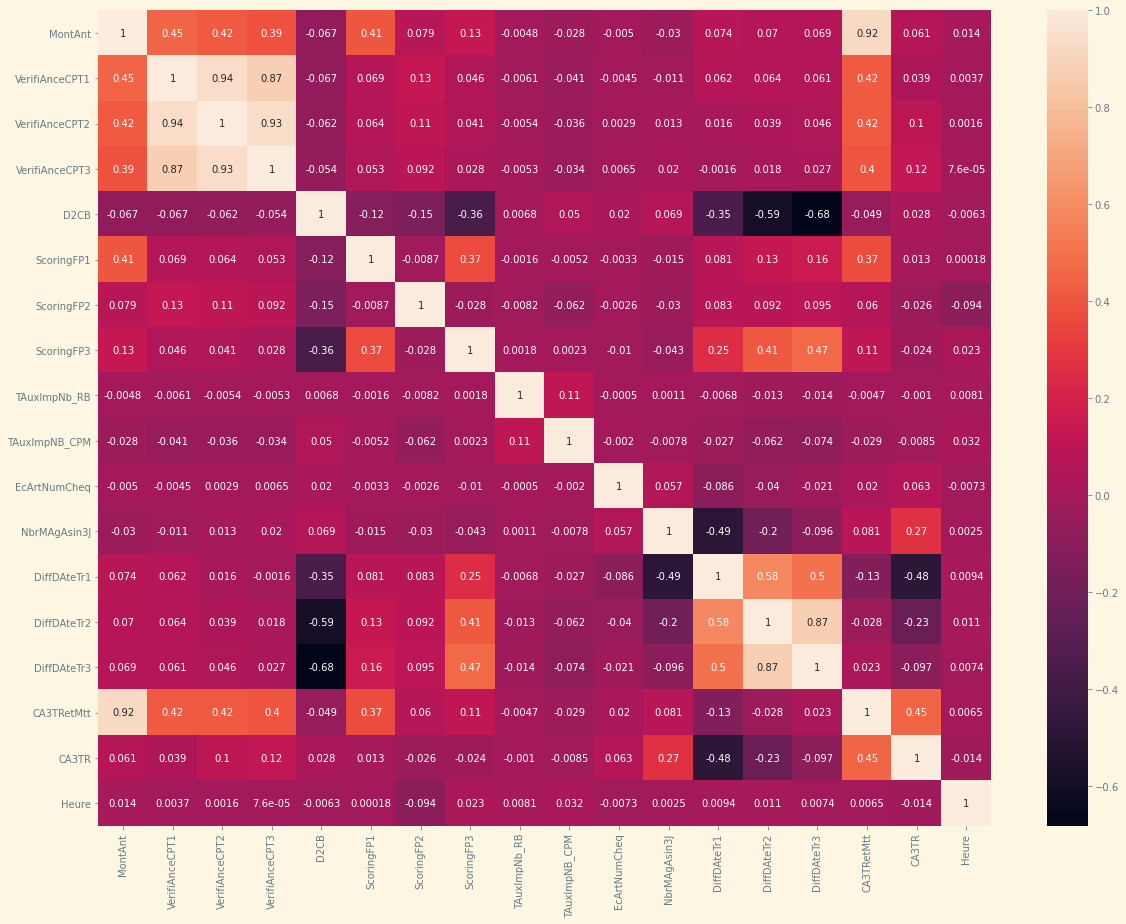

In [20]:
# librairies
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['Solarize_Light2'])

import seaborn as sns
correlation_mat = dfcorr.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation_mat, annot = True)
plt.show()

On remarque que les coefficients de corrélation importants sont des variables qui ont un lien évident entre elles. Comme par exemple, les scores des variables VérifianceCPT1, VérifianceCPT2 et VérifianceCPT3. Autrement il n'y a pas de corrélation évidente entre les variables.

### Binarisation des variables catégorielles

Seule une variable catégorielle est présente dans le jeu de données "CodeDecision". Nous allons créer des variables à partir de ses modalités.

In [21]:
# Binarisation de la variable CodeDecision
CodeDecision_bin = pd.get_dummies(df.CodeDecision)
CodeDecision_bin.rename(columns={0:"CodeDecision_0", 2:"CodeDecision_2", 3:"CodeDecision_3"}, inplace=True)
CodeDecision_bin.head()

,CodeDecision_0,CodeDecision_2,CodeDecision_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Remplacer la variables CodeDecision par la binarisation de ses modalités
df_bin = df.drop(['CodeDecision'], axis=1)
df_bin = pd.concat([df_bin,CodeDecision_bin], axis=1, join='inner')
df_bin.head()

,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye,CodeDecision_0,CodeDecision_2,CodeDecision_3
0,A034010041908012010710730,71051532,40.17,2016-03-21 07:47:38,1,1,1,535,0.0,0.0,...,4.0,4.0,4.0,40.17,0.0,28058,0,1,0,0
1,A035010041908006493331734,71051533,20.00,2016-03-21 08:04:57,0,0,0,358,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29097,0,1,0,0
2,A013010003908005150136747,71051534,35.00,2016-03-21 08:06:45,0,0,0,199,0.0,0.0,...,4.0,4.0,4.0,35.00,0.0,29205,0,1,0,0
3,A013010041908025639221029,71051536,20.00,2016-03-21 08:11:38,0,0,0,38,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29498,0,1,0,0
4,A013010003908005556100283,71051538,20.00,2016-03-21 08:17:11,0,0,0,26,0.0,0.0,...,4.0,4.0,4.0,20.00,0.0,29831,0,1,0,0


### Exploration par mois des données

Nous cherchons ensuite à savoir si la période influence les transactions et les variables qui les caractérisent.

In [23]:
# Création d'une nouvelle variable mois
df2 = df
df2['month'] = pd.DatetimeIndex(df['DAteTrAnsAction']).month
refus2 = df2[df2['FlAgImpAye'] == 1]
accept2 = df2[df2['FlAgImpAye'] == 0]

MONTANT : Léger pic en avril puis plutôt stable de juin à septembre pour les montants de transactions.

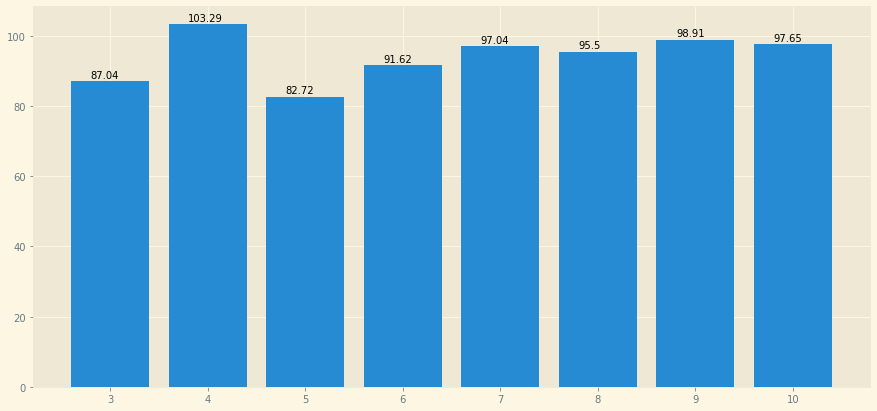

In [24]:
#plot data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
x = df2.month.unique()
y = refus2.groupby(['month']).mean()['MontAnt']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .8, v + 1, str(round(v,2)))

SCORING FP1

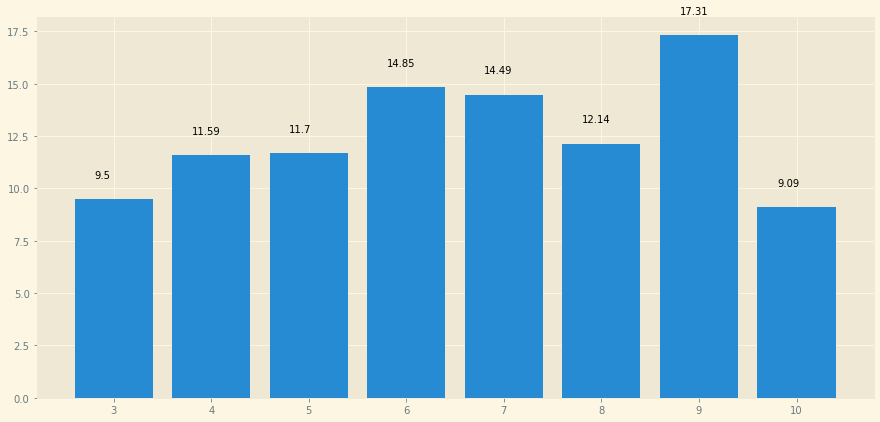

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['ScoringFP1']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .8, v + 1, str(round(v,2)))

SCORING FP2

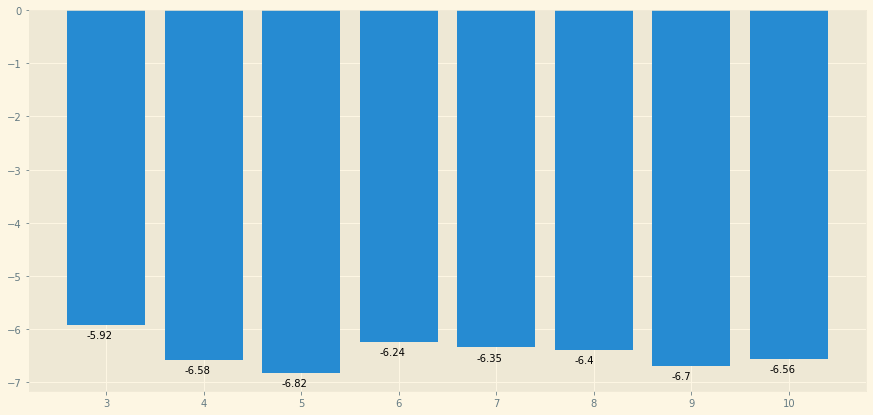

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['ScoringFP2']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .8, v - .25, str(round(v,2)))

SCORING FP3

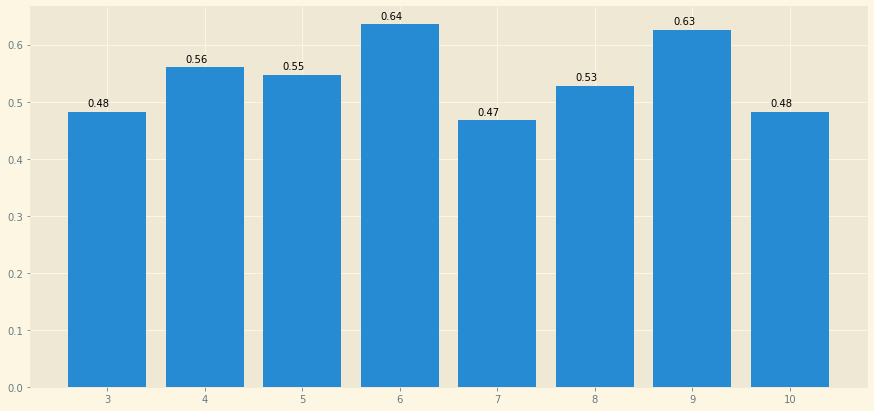

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['ScoringFP3']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .8, v + .01, str(round(v,2)))

TAUX IMPAYES DANS LA REGION

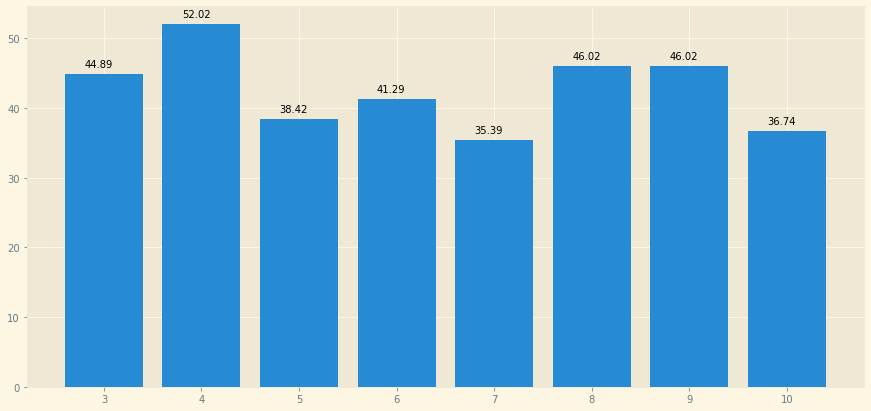

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['TAuxImpNb_RB']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .8, v + 1, str(round(v,2)))

NOMBRE DE TRANSACTIONS FRAUDULEUSES : les mois de mars et septembre ne font pas 30 jours dans on ne peut pas interpréter leur nombre moins important. Les autres mois sont plutôt stables en nombre. Pas de tendance notable.

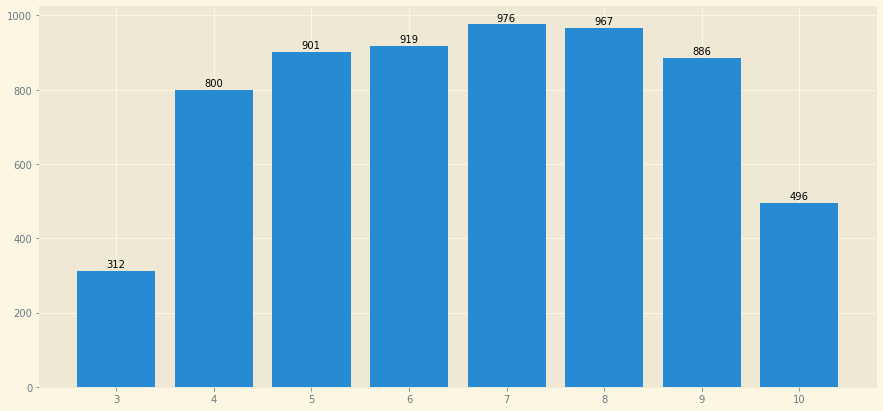

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).count()['FlAgImpAye']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .9, v + 10, str(round(v,2)))

DIFFDATATR1

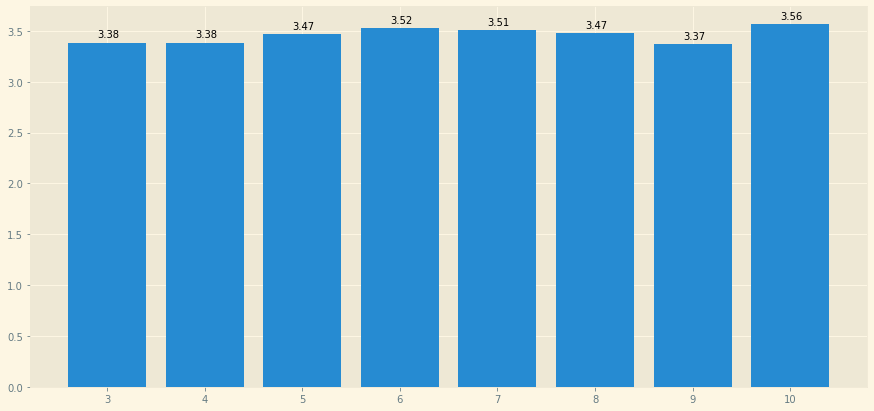

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['DiffDAteTr1']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .9, v + 0.05, str(round(v,2)))

DIFFDATATR2

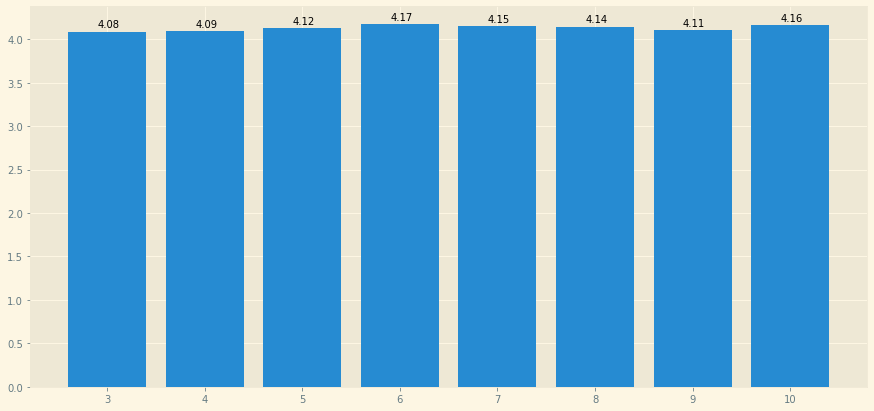

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['DiffDAteTr2']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .9, v + 0.05, str(round(v,2)))

DIFFDATATR3

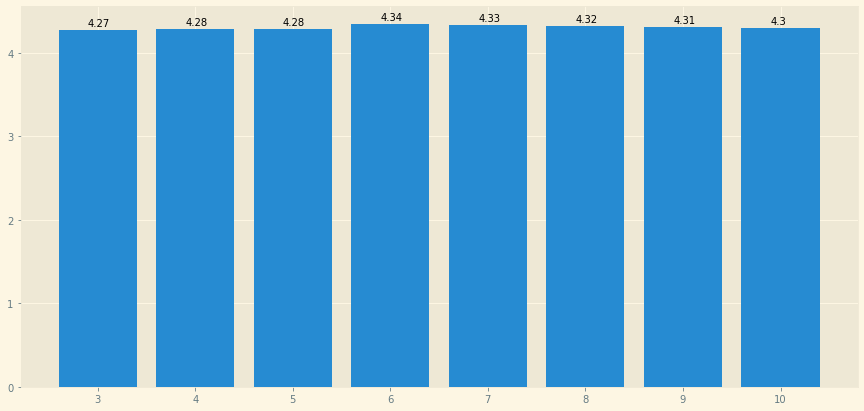

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['DiffDAteTr3']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .9, v + 0.05, str(round(v,2)))

VerifiAnceCPT3

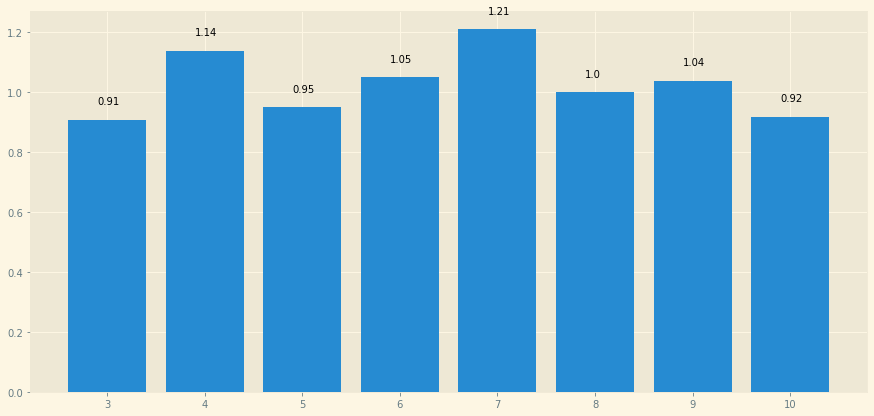

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
y = refus2.groupby(['month']).mean()['VerifiAnceCPT3']
plt.bar(x,y)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] + .9, v + 0.05, str(round(v,2)))

### Définitions des bases d'apprentissage et de test

Nous définissons ci dessous les bases d'apprentissage et de test. Nous optons pour une base de test avec le dernier mois de transactions et une base d'apprentissage avec le mois précedent de transactions. Un seul moi pour l'apprentissage pour optimiser les temps de calcul des différentes algorithmes.

In [34]:
split_date_test ='2016-09-20 00:00:01'
split_date_small ='2016-08-15 00:00:01'

In [35]:
# Echantillon test
df_test = df_bin.loc[df_bin['DAteTrAnsAction'] > split_date_test]

In [42]:
# Echantillons apprentissage
df_train_small = df_bin.loc[(df_bin['DAteTrAnsAction'] > split_date_small)&(df_bin['DAteTrAnsAction'] <= split_date_test)]

In [43]:
#print(df_train_large.shape)
print(df_train_small.shape)
print(df_test.shape)

(339152, 25)
(264143, 25)


Nous retirons certaines variables du jeu de données que nous ne jugeons pas utile.

In [44]:
# Construisons nos sets d'apprentissage de base
X_train = df_train_small.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye','ScoringFP3','NbrMAgAsin3J','DiffDAteTr1','DiffDAteTr2','DiffDAteTr3','Heure'], axis = 1)
X_test = df_test.drop(['ZIBZIN', 'IDAvisAutorisAtionCheque','DAteTrAnsAction','FlAgImpAye','ScoringFP3','NbrMAgAsin3J','DiffDAteTr1','DiffDAteTr2','DiffDAteTr3','Heure'], axis = 1)
y_train = df_train_small['FlAgImpAye']
y_test = df_test['FlAgImpAye']

In [45]:
print(X_train.shape)
print(y_test.shape)

(339152, 15)
(264143,)


***

## 2. RE SAMPLING ET PRE PROCESS

### Algorithmes d'oversampling et d'undersampling

Nous décidons de tester ici plusieurs stratégies :
- oversampling SMOTE 10/90 (1)
- oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)
- oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)

Vérifions le taux de fraude sur l'échantillon d'apprentissage tout d'abord

In [46]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage
accept_train = sum(y_train==0)
refus_train = sum(y_train==1)

print("Nombre de transactions acceptées : {}".format(accept_train))
print("Nombre de transactions refusées  : {}".format(refus_train))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx = refus_train / (accept_train+refus_train) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx))

Nombre de transactions acceptées : 338030
Nombre de transactions refusées  : 1122
Taux de transactions refusées sur le total : 0.33 %


Taux cohérent avec le taux sur la population globale (0,28%)

Stratégie (1) : oversampling SMOTE 10/90

In [47]:
# Installation package imbalanced-learn
#!pip install -U imbalanced-learn

In [48]:
# transformation du dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=10/90, random_state=42)
X_train_s1, y_train_s1 = oversample.fit_resample(X_train, y_train)

In [49]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s1 = sum(y_train_s1==0)
refus_train_s1 = sum(y_train_s1==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s1))
print("Nombre de transactions refusées  : {}".format(refus_train_s1))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s1 = refus_train_s1 / (accept_train_s1+refus_train_s1) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s1))

Nombre de transactions acceptées : 338030
Nombre de transactions refusées  : 37558
Taux de transactions refusées sur le total : 10.00 %


Nous avons un premier set d'échantillons avec de l'oversampling. Nous pourrons tester nos algorithmes avec ce premier set.

Construisons un deuxième set maintenant.

Stratégie (2) : oversampling SMOTE 5/95 + undersampling aléatoire 1:9

In [50]:
# transform the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE(sampling_strategy=5/95, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=1/9)

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

X_train_s2, y_train_s2 = pipeline.fit_resample(X_train, y_train)

In [51]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s2 = sum(y_train_s2==0)
refus_train_s2 = sum(y_train_s2==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s2))
print("Nombre de transactions refusées  : {}".format(refus_train_s2))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s2 = refus_train_s2 / (accept_train_s2+refus_train_s2) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s2))

Nombre de transactions acceptées : 160119
Nombre de transactions refusées  : 17791
Taux de transactions refusées sur le total : 10.00 %


Nous avons un deuxième set d'échantillons avec oversampling et undersampling qui nous donne un ratio transactions refusées/acceptées de 10/90.

Construisons un troisième set maintenant.

Stratégie (3) : oversampling SMOTE 30/70 + undersampling aléatoire 1:1

In [52]:
# transform the dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE(sampling_strategy=30/70, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=1)

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

X_train_s3, y_train_s3 = pipeline.fit_resample(X_train, y_train)

In [53]:
# Vérifions le taux de fraude sur l'échantillon d'apprentissage avec over-sampling
accept_train_s3 = sum(y_train_s3==0)
refus_train_s3 = sum(y_train_s3==1)

print("Nombre de transactions acceptées : {}".format(accept_train_s3))
print("Nombre de transactions refusées  : {}".format(refus_train_s3))

# Taux de transactions refusées dans l'échantillon d'entrainement
tx_s3 = refus_train_s3 / (accept_train_s3+refus_train_s3) *100
print("Taux de transactions refusées sur le total : {0:.2f} %".format(tx_s3))

Nombre de transactions acceptées : 144870
Nombre de transactions refusées  : 144870
Taux de transactions refusées sur le total : 50.00 %


Nous avons un troisième set d'échantillons avec oversampling et undersampling qui nous donne un ratio transactions refusées/acceptées de 50/50.

***

## 3. TRAITEMENT AVEC ALGORITHMES NON SUPERVISES

Nous essayons d'abord une première approche de clustering avec des algorithmes non supervisés (DBSCAN et KMeans) pour voir s'il y a des clusters de transactions frauduleuses qui peuvent se former et qui pourrait être utilisés dans un pré-traitement.

#### Scaling

Les données ont besoin d'être centrées réduites pour pouvoir fonctionner avec des algorithmes qui se basent sur des notions de distance.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.fit_transform(X_test, y_test)

## DBSCAN

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from time import time
start = time()

model = DBSCAN(n_jobs=-1)
model.fit(X_test_scaled)

# cluster labels
pred_labels = model.labels_
# D2compte du nopmbre de clusters
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)
# Visualisation des résultats
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_test_scaled, pred_labels))
# Décompte dans chaque cluster
counts = np.bincount(pred_labels[pred_labels>=0])
print(counts)
# Trier les décomptes de clusters pour ne retenir que les plus petits
i = n_clusters_
while counts[np.argsort(counts)[:(i-1)]].sum() > 0.01*len(pred_labels) : # on cherche à identifier 1% de fraude 
    smallest_clusters = np.argsort(counts)[:(i-1)]
    i-=1
print("The smallest clusters are clusters:")      
print(smallest_clusters)
# Décomptes des plus petits clusters retenus
print("Their counts are:")      
print(counts[smallest_clusters])

done = time() 
tps = round(done - start,3)

Estimated number of clusters: 227
Silhouette Coefficient: -0.150
[ 74887 156295    198   5761   2172   1003    230    401    980    370
    114     79    361     22     48    143    988     44     23     24
     92    207      6     76     14      5     19    109    334    222
      6     11    102     36     60     22      5     49    182     11
      6     21      5     12      5      5     12     21      6      8
     38     21     15      7     29      8     10     13     18      8
      6     27      8      8      7      4      4     17      8     33
      9      8      6      6     15      4      4      8      5      6
     20      5      6     10      5      6     11     12      7      4
     10     12      6     16     12     10      6      4     10      9
      5     12      5      6     10      7      5     10      5      7
      5      5      5      7      7      6     10      6      8      7
      4     14      4      9      5      6     15      5      3      6
      5     

In [56]:
y_pred = np.empty([len(pred_labels)])
for i in range(len(pred_labels)):
    y_pred[i] = 1 if pred_labels[i] in smallest_clusters else 0

y_pred = pd.DataFrame(y_pred).astype(int)
y_pred.value_counts()

# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
#print("Best estimator : "+str(model.best_params_))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))

Train set size : 339152
Test set size : 264143
[[260638   2650]
 [   831     24]]
F1-score : 0.014
ROC AUC score : 0.509
Elapsed time : 2390.26


Les performances ne sont pas à la hauteur de nos attentes avec cet algorithme. Le score de F1 est seulement de 0.014.

## K-Means

Pour l'algorithme des KMeans, nous utilisons sa version MiniBatchKMeans qui se calcule plus rapidement sur des grands ensemble de données. Une fois les clusters créés, nous tentons de voir si les transactions frauduleuses ne se situeraient pas à la périphérie des clusters. Nous prenons l'hypothèse que c'est le cas et testons l'algorithme avec nos données test.

In [57]:
from sklearn.cluster import MiniBatchKMeans
from time import time

start = time()
model = MiniBatchKMeans(n_clusters=10, random_state=56, verbose=0)
model.fit(X_test_scaled)

# Prédiction des clusters
X_clusters = model.predict(X_test_scaled)
# Cluster centroids
X_clusters_centers = model.cluster_centers_
# Calcul de la distance de chaque point à son centroid
dist = [np.linalg.norm(x-y) for x,y in zip(X_test_scaled,X_clusters_centers[X_clusters])]
# Creation des prédictions basé sur la distance
km_y_pred = np.array(dist)
km_y_pred[dist>=np.percentile(dist, 99)] = 1
km_y_pred[dist<np.percentile(dist, 99)] = 0

done = time() 
tps = round(done - start,3)

In [58]:
# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,km_y_pred)
f1 = f1_score(y_test,km_y_pred)
auc = roc_auc_score(y_test,km_y_pred)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
#print("Best estimator : "+str(model.best_params_))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))

Train set size : 339152
Test set size : 264143
[[260716   2572]
 [   785     70]]
F1-score : 0.040
ROC AUC score : 0.536
Elapsed time : 2.655


Les performances ne sont pas très bonnes avec un F1-score de 0.04.

***

## 4. TRAITEMENT AVEC ALGORITHMES SUPERVISES

Nous testons dans un deuxième temps les méthodes suivantes, en étapes successives :
- un arbre de décision simple
- Random Forest
- Gradient tree boosting
- Régression logistique
- K-nearest neighbors

### Arbre de décision simple sans resampling

In [59]:
import numpy as np
from time import time
from sklearn.model_selection import GridSearchCV

In [60]:
#Hyperparamètres 
params = {"max_depth": [3,6,9,12, None], 
            "min_samples_leaf": np.arange(1,9,1), 
            "criterion": ["gini", "entropy"]}

In [61]:
# Modélisation
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, make_scorer

In [62]:
# Sans resampling
ct = DecisionTreeClassifier(class_weight='balanced')
start = time()
classTree = GridSearchCV(ct, params, cv=5, n_jobs=-1, scoring=make_scorer(f1_score), verbose=0)
classTree.fit(X_train,y_train)
# Prédiction
y_pred_DTC = classTree.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,1)
# Métriques sur l'échantillon de validation
cm = confusion_matrix(y_test,y_pred_DTC)
f1 = f1_score(y_test,y_pred_DTC)
auc = roc_auc_score(y_test,y_pred_DTC)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print("Best estimator : "+str(classTree.best_params_))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))

Train set size : 339152
Test set size : 264143
Best estimator : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
[[262503    785]
 [   817     38]]
F1-score : 0.045
ROC AUC score : 0.521
Elapsed time : 483.6


### RandomForest avec oversampling SMOTE 5/95 + undersampling aléatoire 1:9 (2)

In [63]:
#hyperparamètres
params_rf_simple = {'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0], 'n_estimators': [200, 300, 400, 500]}

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Avec oversampling + undersampling
rf_s2 = RandomForestClassifier()
# cv = [(slice(None), slice(None))]
start = time()
random_forest_s2 = GridSearchCV(rf_s2, params_rf_simple, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
random_forest_s2.fit(X_train_s2,y_train_s2)
# Prédiction
y_pred_bagging_s2 = random_forest_s2.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s2 = confusion_matrix(y_test,y_pred_bagging_s2)
f1_s2 = f1_score(y_test,y_pred_bagging_s2)
auc_s2 = roc_auc_score(y_test,y_pred_bagging_s2)

print("Train set size : "+str(X_train_s2.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print("Best estimator : "+str(random_forest_s2.best_params_))
print(cm_s2)
print("F1-score : {0:.3f}".format(f1_s2))
print("ROC AUC score : {0:.3f}".format(auc_s2))
print("Elapsed time : "+str(tps))

KeyboardInterrupt: 

### Gradient Boosting avec oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)

In [ ]:
#Hyperparamètres 
params_gb_simple={'n_estimators': [50,100], 'max_depth':[4,8], 'learning_rate':[0.25,0.1,0.05]} 

In [ ]:
# Avec oversampling + undersampling
gb_s3 = GradientBoostingClassifier()
start = time()
boosting_s3 = GridSearchCV(gb_s3, params_gb_simple, cv=5, n_jobs=-1, scoring=make_scorer(f1_score))
boosting_s3.fit(X_train_s3,y_train_s3)
# Prédiction
y_pred_boosting_s3 = boosting_s3.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)
# Métriques sur l'échantillon de validation s2
cm_s3 = confusion_matrix(y_test,y_pred_boosting_s3)
f1_s3 = f1_score(y_test,y_pred_boosting_s3)
auc_s3 = roc_auc_score(y_test,y_pred_boosting_s3)

print("Train set size : "+str(X_train_s3.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print("Best estimator : "+str(boosting_s3.best_params_))
print(cm_s3)
print("F1-score : {0:.3f}".format(f1_s3))
print("ROC AUC score : {0:.3f}".format(auc_s3))
print("Elapsed time : "+str(tps))

### Logistic Regression sans resampling

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s1_scaled = scaler.fit_transform(X_train_s1, y_train)
X_train_s2_scaled = scaler.fit_transform(X_train_s2, y_train)
X_train_s3_scaled = scaler.fit_transform(X_train_s3, y_train)

In [ ]:
#Hyperparamètres 
params_lr_large = {'class_weight':[None,'balanced'], 'penalty':['l2', None], 'C':[0.001,0.01,0.1,1,10]}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, make_scorer
from time import time

# Sans resampling
model = LogisticRegression()
start = time()
model = GridSearchCV(model, params_lr_large, cv=5, n_jobs=-1, scoring=make_scorer(f1_score), verbose=0)
model.fit(X_train_scaled,y_train)

# Prédiction
y_pred = model.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)

# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print("Best estimator : "+str(model.best_params_))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))

### KNN avec oversampling SMOTE 30/70 + undersampling aléatoire 1:1 (3)

In [ ]:
#Hyperparamètres 
params_knn={'n_neighbors':[5,9,13,25]} 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
start = time()
model = GridSearchCV(model, params_knn, cv=5, n_jobs=-1, scoring=make_scorer(f1_score), verbose=0)
model.fit(X_train_s3_scaled,y_train_s3)

# Prédiction
y_pred = model.best_estimator_.predict(X_test)
done = time() 
tps = round(done - start,3)

# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print("Best estimator : "+str(model.best_params_))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))

### VOTING CLASSIFIER sans resampling

In [ ]:
from sklearn.ensemble import VotingClassifier
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

start = time()

clf1 = LogisticRegression(C=10, class_weight=None, penalty='l2',random_state=1)
clf2 = GradientBoostingClassifier(learning_rate=0.25, max_depth=8, n_estimators=100)
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1,random_state=1)

#ensemble_model = VotingClassifier(estimators=[('lr', clf1),('knn', clf2), ('dt', clf3)], voting='hard')
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('gb', clf2),('dt', clf3)], voting='soft', weights=[1,1,1])
ensemble_model.fit(X_train_scaled, y_train)

y_pred = ensemble_model.predict(X_test)
done = time() 
tps = round(done - start,3)

# Métriques sur l'échantillon de validation
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

print("Train set size : "+str(X_train.shape[0]))
print("Test set size : "+str(X_test.shape[0]))
print(cm)
print("F1-score : {0:.3f}".format(f1))
print("ROC AUC score : {0:.3f}".format(auc))
print("Elapsed time : "+str(tps))